# Linear Regression Model to Find Correlation Between Age and Insurance Cost

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

## Import dataset and process data for plotting

In [62]:
# Import dataset
df = pd.read_csv('insurance.csv')

# Select only the relevant data
age_and_cost = df[['age', 'charges']]

# Order the data by age and reset index column
age_and_cost_ordered = age_and_cost.sort_values(['age'], ascending=True).reset_index(drop=True)

## Plot data and make initial findings

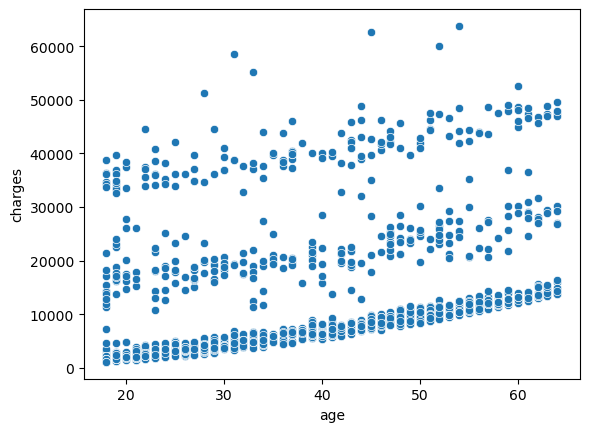

- We can see from this graph that there are three clear 'groups' or 'bands' of insurance cost.
- In order to gain a single, clear line of best fit we will need to find the average insurance 
  cost for each age group.


In [114]:
# Plot data
plt.figure()
sns.scatterplot(data=age_and_cost_ordered, x='age', y='charges')
plt.show()
plt.close()

# Summarise initial findings
print(
    "- We can see from this graph that there are three clear 'groups' or 'bands' of insurance cost.\n"
    "- In order to gain a single, clear line of best fit we will need to find the average insurance \n"
    "  cost for each age group."
)

## Refine data based on inital findings and replot

In [115]:
# Group data by age and find mean charge for each group
# grouped_age_and_cost = age_and_cost.groupby('age').mean('charges')
grouped_age_and_cost = age_and_cost.groupby('age')['charges'].mean().reset_index()

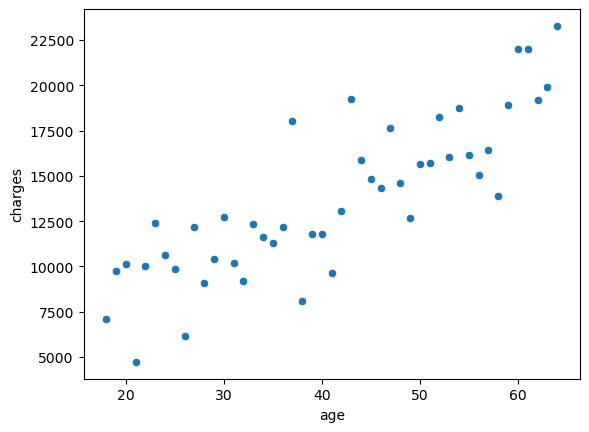

- We can see here, the data is much better suited to finding a single line of best fit.


In [117]:
# Plot data
plt.figure()
sns.scatterplot(data=grouped_age_and_cost, x='age', y='charges')
plt.show()
plt.close()

# Summarise findings
print(
    "- We can see here, the data is much better suited to finding a single line of best fit."
)

## Apply Linear Regression modelling

In [126]:
# Create a 2D array
x = grouped_age_and_cost['age'].values.reshape(-1, 1)
y = grouped_age_and_cost['charges'].values

In [127]:
# Fit and predict
insurance_model = LinearRegression()
insurance_model.fit(x, y)
y_pred = insurance_model.predict(x)

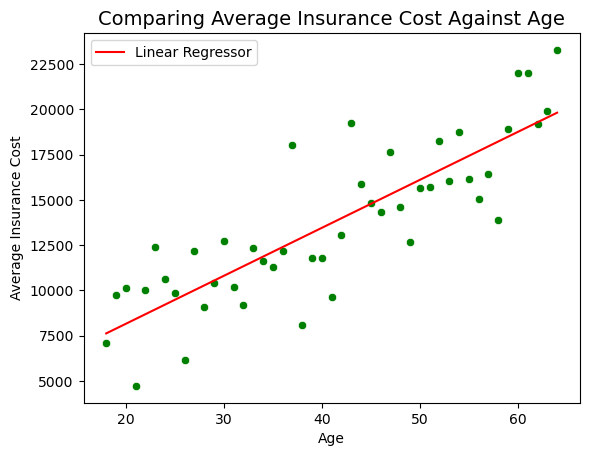

- From this graph it's clear to see that there is a correlation between age and insurance cost.
- The average cost of insurance for 30-year-olds is roughly 10000, whereas this is doubled for those
  who are aged 65.
- It would be interesting to understand what type of insurance this is. I assume it's life insurance,
  as the likelihood of a claim will go up as age increases.
- It can be said with a degree of confidence that it's not car insurance.


In [128]:
# Plot refined data
plt.figure()
sns.scatterplot(data=grouped_age_and_cost, x='age', y='charges', color='green')
plt.plot(x, y_pred, label='Linear Regressor', color='red')

# Customise plot
plt.title('Comparing Average Insurance Cost Against Age', fontdict={'fontsize': 14})
plt.xlabel('Age')
plt.ylabel('Average Insurance Cost')

# Print plot
plt.legend()
plt.show()
plt.close()

# Print summary
print(
    "- From this graph it's clear to see that there is a correlation between age and insurance cost.\n"
    "- The average cost of insurance for 30-year-olds is roughly 10000, whereas this is doubled for those\n"
    "  who are aged 65.\n"
    "- It would be interesting to understand what type of insurance this is. I assume it's life insurance,\n"
    "  as the likelihood of a claim will go up as age increases.\n"
    "- It can be said with a degree of confidence that it's not car insurance."
)

## Extend linear regressor to make predictions beyond gathered data

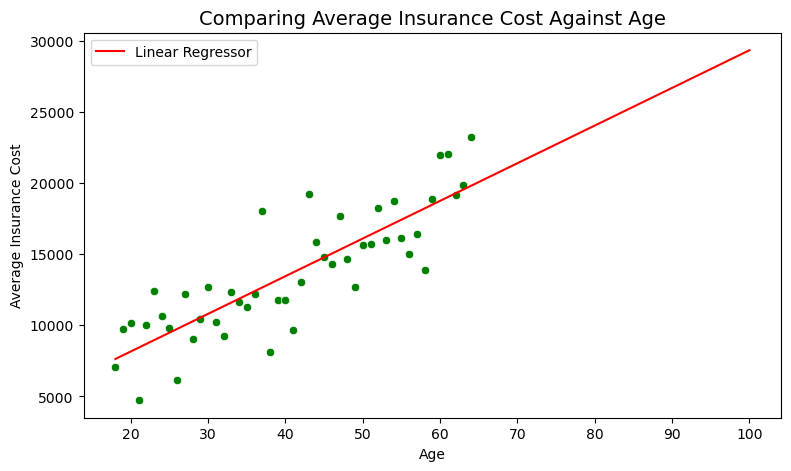

Predicted insurance costs by age:
70 = 21400.66 
80 = 24048.98 
90 = 26697.30 
100 = 29345.61


In [153]:
# Set prediction age-points
unknown_a = [[70]]
unknown_b = [[80]]
unknown_c = [[90]]
unknown_d = [[100]]

# Reshape and refit
x_pred = np.append(x, 100).reshape(-1,1)
y_pred = insurance_model.predict(x_pred)

# Plot prediction graph
plt.figure(figsize=(9,5))
sns.scatterplot(data=grouped_age_and_cost, x='age', y='charges', color='green')
plt.plot(x_pred, y_pred, label='Linear Regressor', color='red')

# Customise plot
plt.title('Comparing Average Insurance Cost Against Age', fontdict={'fontsize': 14})
plt.xlabel('Age')
plt.ylabel('Average Insurance Cost')
plt.xticks([20,30,40,50,60,70,80,90,100])

# Print plot
plt.legend()
plt.show()
plt.close()

# Format predictions at two decimal places
pred_70 = format(float(insurance_model.predict(unknown_a)), '.2f')
pred_80 = format(float(insurance_model.predict(unknown_b)), '.2f')
pred_90 = format(float(insurance_model.predict(unknown_c)), '.2f')
pred_100 = format(float(insurance_model.predict(unknown_d)), '.2f')

print(
    "Predicted insurance costs by age:"
    f"\n70 = {pred_70}",
    f"\n80 = {pred_80}",
    f"\n90 = {pred_90}",
    f"\n100 = {pred_100}"
)